In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
path = '/datb/16011015/ExoGAN_data/selection//' #notice how you dont put the last folder in here...
images = np.load(path+'last_chunks_25_percent_images.npy')

len(images)

1250000

In [3]:
images.shape

(1250000, 1, 32, 32)

In [4]:
images = images.reshape([images.shape[0], 32, 32]) # remove the channel dimension

In [5]:
# Plot some images

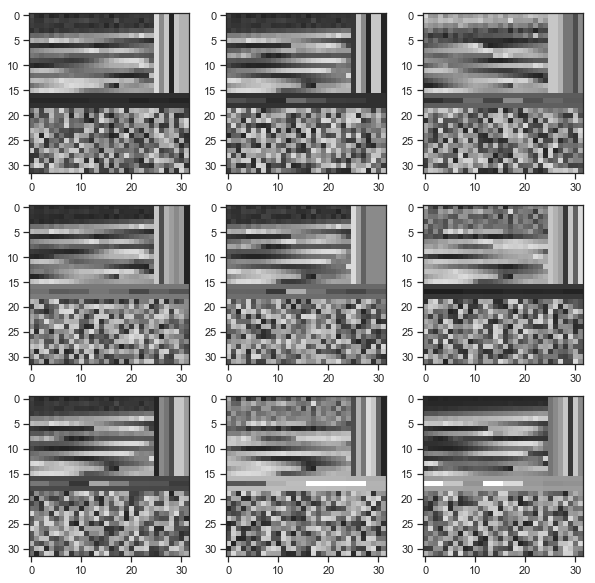

In [6]:
plt.figure(figsize=(10,10))
for i in range(9):
    n = np.random.randint(0, len(images)) # make sure the 9 images are a random selection
    img = images[n]
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1.2)

# Looking at the params

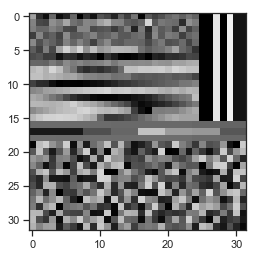

In [7]:
img = images[0] # select one image
plt.imshow(img, cmap='gray', vmin=0, vmax=1.2)

In [8]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

dfs=[]
for img in tqdm(images[:100000]):
    params_values = [img[:16, 25+i:26+i] for i in range(len(params))] # extract the param image section per param
    params_values = [img.mean() for img in params_values] # take the mean of this param image section as the param value, per param

    # put the param values in a dataframe
    df = pd.DataFrame(params_values).T
    df.columns = params
    dfs.append(df)

100%|██████████| 100000/100000 [00:43<00:00, 2314.07it/s]


In [9]:
%%time

df = pd.concat(dfs)

CPU times: user 8.34 s, sys: 114 ms, total: 8.45 s
Wall time: 8.49 s


In [10]:
df.head()

,planet_mass,temp_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
0,-0.666667,-0.999556,1.074697,-1.142857,1.135550,0.094890,0.094890
0,-0.666667,-0.999778,1.049541,-1.142857,1.142857,1.142857,1.074697
0,-0.666667,-0.999444,1.049541,-1.142857,0.094890,1.106390,1.106390
0,-0.666667,-0.999222,1.135550,-1.142857,1.049541,1.106390,1.006537
0,-0.666667,-0.999444,1.117701,-1.142857,1.074697,1.127265,1.127265


In [11]:
df.describe()

,planet_mass,temp_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,0.498746,0.500951,5.007659e-01,0.499494,5.013040e-01,5.001952e-01,4.998931e-01
std,0.319569,0.321180,3.197109e-01,0.319716,3.197112e-01,3.192408e-01,3.192656e-01
min,-0.666667,-0.999889,-4.615635e-08,-1.142857,-4.615635e-08,-4.615635e-08,-4.615635e-08
25%,0.222222,0.222222,2.222222e-01,0.222222,2.222222e-01,2.222222e-01,2.222222e-01
50%,0.444444,0.555556,5.555555e-01,0.555556,5.555555e-01,4.444444e-01,5.555555e-01
75%,0.777778,0.777778,7.777778e-01,0.777778,7.777778e-01,7.777778e-01,7.777778e-01
max,1.000000,1.000000,1.142857e+00,1.000000,1.142857e+00,1.142857e+00,1.142857e+00


CPU times: user 730 ms, sys: 0 ns, total: 730 ms
Wall time: 738 ms


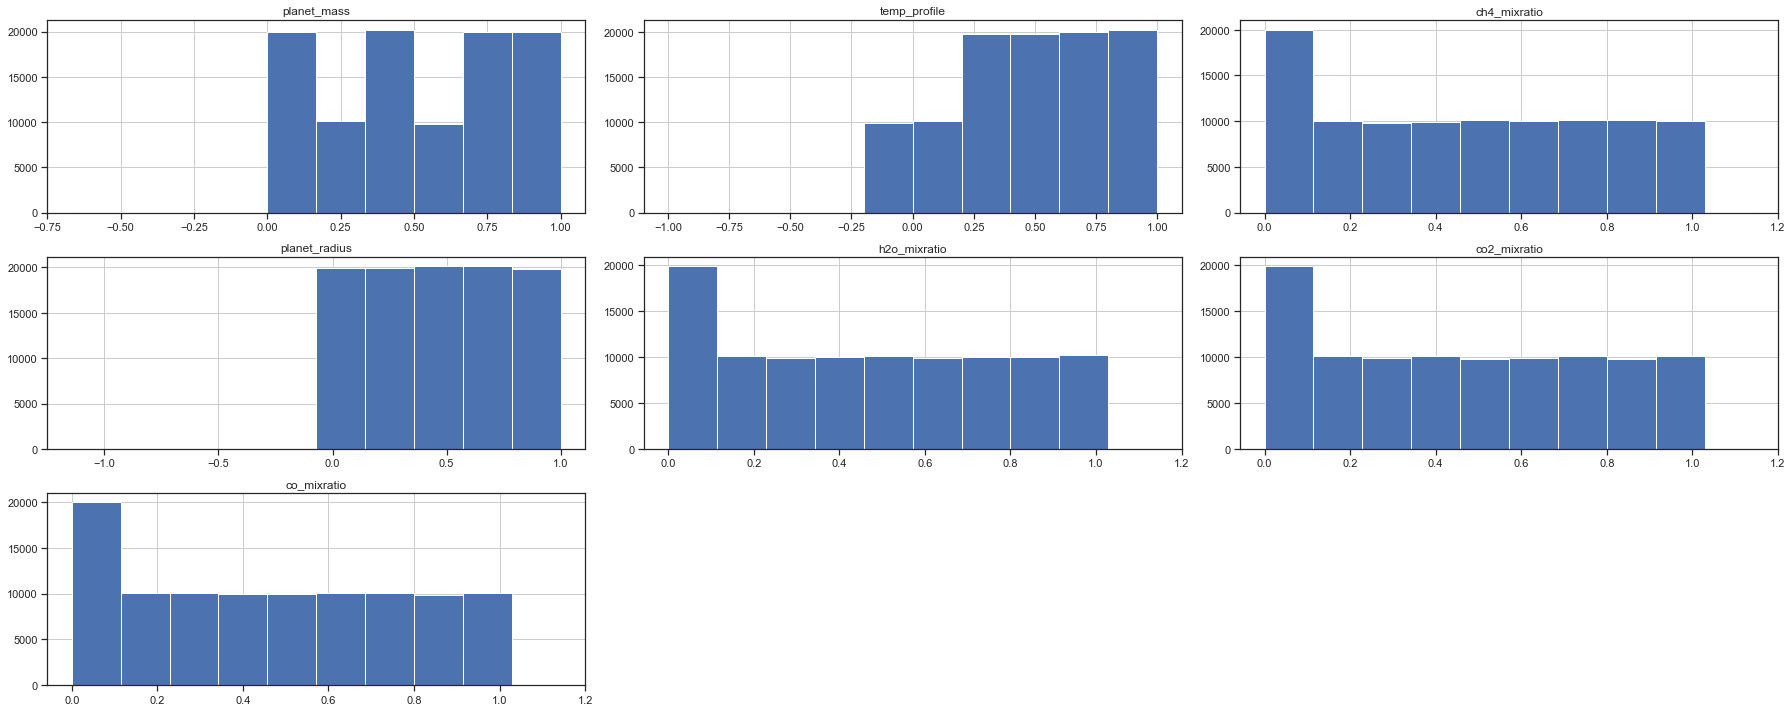

In [12]:
%%time

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param)
    plt.hist(df[param], bins=10)
    plt.grid()
    plt.tight_layout()

# General ASPA statistics

In [16]:
%%time

mean = images.mean()
std = images.std()
min_ = images.min()
max_= images.max()

print('mean: ', mean)
print('std: ', mean)
print('min: ', min_)
print('max: ', max_)

mean:  0.46145595742246565
std:  0.46145595742246565
min:  -1.1428571428571428
max:  9.185413551614628
CPU times: user 49.4 s, sys: 33.4 s, total: 1min 22s
Wall time: 12.4 s
